# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


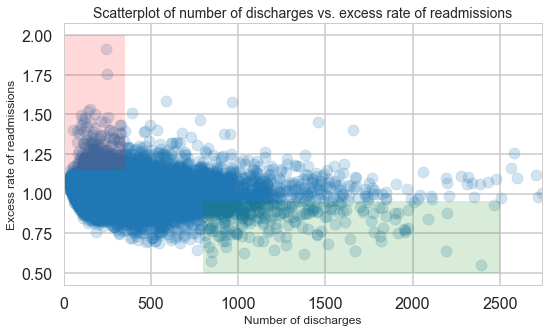

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

The plot below shows that there is small decrease of excess rate of readmissions (ERR) as the number of discharges increase. Thus, we could say that there is negative correlation between discharge and ERR. In order to evaluate if this relation is significant, we run a correlation test that showed that effectively there is a correlation between those two variables. This finding supports the observations in A above. 

However, in B above it is stated that the mean excess readmission rate is different for hospitals with number of discharges < 100 in relation to hospitals with number of discharges number > 1000. But, is this a statistically significant difference that warrants the recommendations made above? This question is left unanswered in the preliminary analysis. The following analysis will answer this question and make recommendations accordingly. 

Text(0,0.5,'Excess rate of readmission')

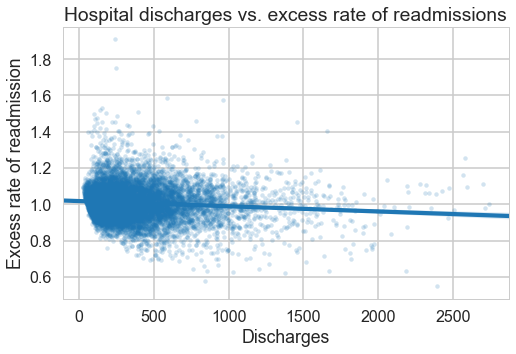

In [5]:
# Check if the data is linear
x = np.asarray(x)
y = np.asarray(y)

fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=x, y=y, ci=95, scatter_kws={'s':20, 'alpha':0.2})
plt.title('Hospital discharges vs. excess rate of readmissions')
plt.xlabel('Discharges')
plt.ylabel('Excess rate of readmission')

In [6]:
print('pearson score:', stats.pearsonr(x, y))
print('=' *70 )
print(stats.linregress(x, y))

pearson score: (-0.09309554287590441, 1.5022756426464526e-23)
LinregressResult(slope=-2.8565052943822637e-05, intercept=1.017947557954422, rvalue=-0.09309554287590444, pvalue=1.502275642661476e-23, stderr=2.8498248278499884e-06)


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.

Here we will evaluate the following groups: 

- HF1 = Hospitals with discharges < 100;
- HF2 = Hospitals with discharges > 1000; and 
- HF3 = Hospitals in between, discharges > 100 and < 1000

This leads to the following null and alternate hypotheses:

H0: There is no difference betwen the mean of the Excess Readmission Rate of HF1, HF2, and HF3: HF1 = HF2 = HF3. 
H1. There is a difference between Excess Readmission Rate of HF1, HF2, and HF3. 

### 2. Compute and report the observed significance value (or p-value).

Since we are comparing three groups, an ANOVA test will be performed. ANOVA tests have the following assumptions:

- The dependent variable is normally distributed in each group that is being compared in the one-way ANOVA.
- There is homogeneity of variances.
- Independence of observaitons.

First, let's evaluate if the data fullfills these assumptions. The normality test shows that none of the groups in the dependent variable is normaly distributed. However, looking at the histograms, we can see that they show a shape close to normality but with some right tail. Since the ANOVA test is considered as robust with regard to the normality of the data, we will keep using this test and, in addition, the Kruskal-Wallis H test to compare results. An alternative would be to transform the data to log or sqrt, but we'll evaluate the results with the original data first. 

From the Lavene test (p-value < .05), we can conclude the there is homogenity of variances among the three groups (HF1, HF2, and HF3). 

Lastly, since every row in the dataset represents a hospital, we can assume that the observations are independent of each other. Now, we can proceed with the ANOVA test.

In [7]:
# Remove null values
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]

# Separate the data into three groups
HF1 = df[df['Number of Discharges'] < 100]
HF2 = df[df['Number of Discharges'] > 1000]
HF3 = df[(df['Number of Discharges'] > 100) & (df['Number of Discharges'] < 1000)]

In [8]:
print(stats.normaltest(HF1['Excess Readmission Ratio']))
print(stats.normaltest(HF2['Excess Readmission Ratio']))
print(stats.normaltest(HF3['Excess Readmission Ratio']))

NormaltestResult(statistic=608.3392518207766, pvalue=7.958109389947964e-133)
NormaltestResult(statistic=16.707705988017082, pvalue=0.0002354874365277063)
NormaltestResult(statistic=1403.708003623307, pvalue=1.5441159586429258e-305)


Text(0.5,1,'H3 (>100 & <1000)')

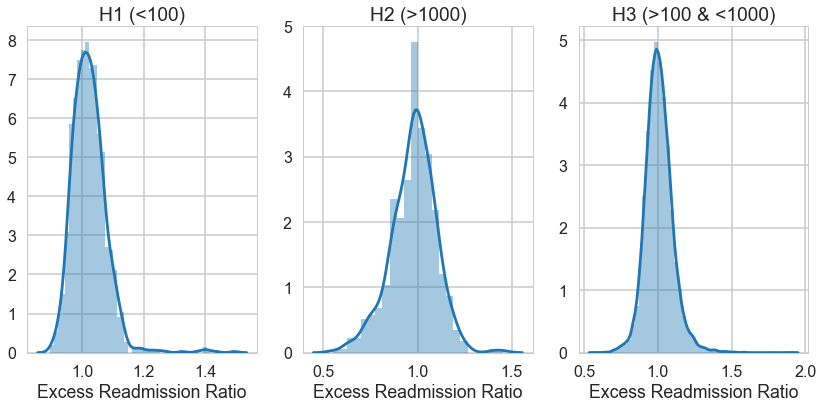

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 6))

sns.distplot(HF1['Excess Readmission Ratio'], ax=ax1)
ax1.set_title('H1 (<100)')
sns.distplot(HF2['Excess Readmission Ratio'], ax=ax2)
ax2.set_title('H2 (>1000)')
sns.distplot(HF3['Excess Readmission Ratio'], ax=ax3)
ax3.set_title('H3 (>100 & <1000)')

In [10]:
# The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
stats.levene(HF1['Number of Discharges'], HF2['Number of Discharges'], HF3['Number of Discharges'])

LeveneResult(statistic=656.0214803556684, pvalue=1.8129969244912556e-270)

In [11]:
print(stats.f_oneway(HF1['Excess Readmission Ratio'], HF2['Excess Readmission Ratio'], HF3['Excess Readmission Ratio']))
print(stats.kruskal(HF1['Excess Readmission Ratio'], HF2['Excess Readmission Ratio'], HF3['Excess Readmission Ratio']))

F_onewayResult(statistic=39.64023828149412, pvalue=6.978290090102746e-18)
KruskalResult(statistic=84.85128011446643, pvalue=3.756458817064764e-19)


### 3. Report statistical significance for  α = .01.

Both the ANOVA and the Kruskal-Wallis H tests output p-values smaller that .05. This, in turn, rejects the null hypothesis that the mean Excess Readmission Ratio of the three groups is the same different. 

A post hoc test (Tukey's range) actually shows that the mean of each group is statistically different from the other two groups, respectively. Thus, we can state that the Excess Readmission Ratio from each groups is different from any other's group. 

In [12]:
# Create column with subgroups
df['subgroups'] = ['HF1' if x < 100 else 'HF2' if x > 1000 else 'HF3' for x in df['Number of Discharges']]
print(df['subgroups'].unique())

# Post hoc analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Excess Readmission Ratio'] , df['subgroups'])
result = mc.tukeyhsd()
print(result)

['HF1' 'HF3' 'HF2']
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 HF1    HF2   -0.0443  -0.0561 -0.0325  True 
 HF1    HF3   -0.0156  -0.0222  -0.009  True 
 HF2    HF3    0.0287   0.0185  0.0389  True 
---------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
